<a href="https://colab.research.google.com/github/ShubhamX12/Deep-learning-/blob/main/Azymer_Diease_detection1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [21]:
! chmod 600 ~/.kaggle/kaggle.json


In [ ]:
#  DATASET COLLECT

In [22]:
!kaggle datasets download -d tourist55/alzheimers-dataset-4-class-of-images

 97% 33.0M/34.1M [00:02<00:00, 22.9MB/s]
100% 34.1M/34.1M [00:02<00:00, 14.2MB/s]


In [23]:
import zipfile
zip_ref=zipfile.ZipFile("/content/alzheimers-dataset-4-class-of-images.zip","r")
zip_ref.extractall('/content')
zip_ref.close();

In [24]:
#DATA PROCESSING:
!git clone https://github.com/dvschultz/dataset-tools.git

fatal: destination path 'dataset-tools' already exists and is not an empty directory.


In [50]:
!cp -a /content/AlzheimerDataset/train/  /content/AlzheimerDataset/train1

In [36]:
!python /content/dataset-tools/dataset-tools.py --input_folder /content/AlzheimerDataset/train/VeryMildDemented/ --output_folder /content/AlzheimerDataset/train/VeryMildDemented --process_type crop --height 160 --width 120

Processing folder: /content/AlzheimerDataset/train/VeryMildDemented/


In [41]:
!rm -r /content/AlzheimerDataset/train/MildDemented1

rm: cannot remove '/content/AlzheimerDataset/train/MildDemented1': No such file or directory


In [43]:
IMAGE_SIZE1=160
IMAGE_SIZE2=120
BATCH_SIZE=32
CHANNELS=3
EPOCHS=10

In [44]:
import tensorflow  as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import HTML


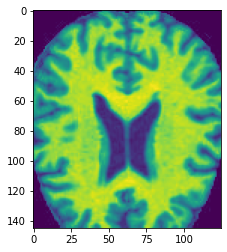

In [14]:
im = Image.open(r"/content/im.jpg")
im1 = im.crop((25,25,150,170)) 
plt.imshow(im1)

In [52]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/AlzheimerDataset/train1/train",
    shuffle=True, 
    image_size=(IMAGE_SIZE1,IMAGE_SIZE2),
    batch_size=BATCH_SIZE, 
)

Found 6400 files belonging to 5 classes.


In [53]:
class_names=dataset.class_names
class_names

['.ipynb_checkpoints',
 'MildDemented',
 'ModerateDemented',
 'NonDemented',
 'VeryMildDemented']

In [48]:
len(dataset)

200

In [49]:
for image_batch,label_batch in dataset.take(1):
   print(image_batch.shape)
   print(label_batch.numpy())
   pass

(32, 160, 120, 3)
[4 4 3 3 4 4 3 4 3 4 4 3 3 4 3 3 4 1 4 1 1 4 4 3 3 4 3 3 1 3 3 4]


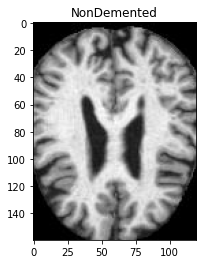

In [54]:
for image_batch,label_batch in dataset.take(1):
   plt.imshow(image_batch[0].numpy().astype("uint8"))
   plt.title(class_names[label_batch[0]]); 

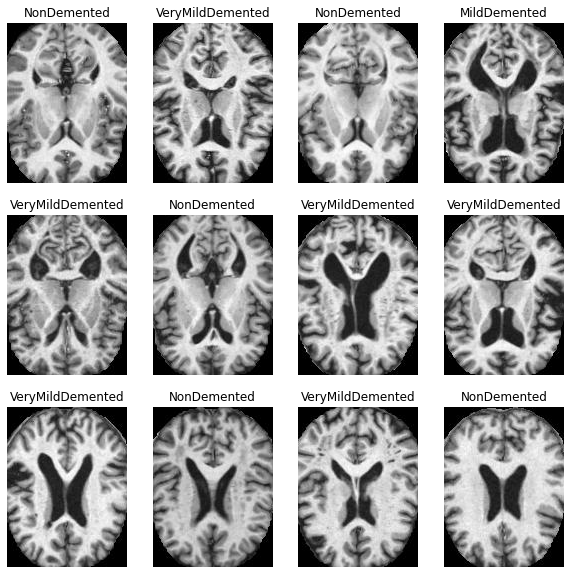

In [55]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in dataset.take(1):
  for i in range(12):
     ax=plt.subplot(3,4,i+1);
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]]); 
     plt.axis("Off");

TRAINIG AND VALIDATION AND TESTING:

 


70%  :-Training 
30/% :-10 valdidation 20 test

In [56]:
train_size=0.7
print(len(dataset)*train_size);

140.0


In [57]:
train_ds=dataset.take(140)
print(len(train_ds))

140


In [58]:
test_ds=dataset.skip(148)
print(len(test_ds))

52


In [59]:
val_size=0.1
print(len(dataset)*val_size)

20.0


In [60]:
val_ds=test_ds.take(20);
print(len(val_ds))

20


In [61]:
test_ds=test_ds.skip(20)
print(len(test_ds))

32


In [62]:
def get_dataset_partitions_tf(ds,train_split=0.7,val_split=0.1,test_split=0.2,shuffle=True,shuffle_size=10000):
    ds_size=len(ds)
    if shuffle:
         ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split*ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_da=ds.skip(train_size).skip(val_size)
    return train_ds,val_ds,test_ds;

In [63]:
train_ds,val_ds,test_ds=get_dataset_partitions_tf(dataset);

In [64]:
len(train_ds)

140

In [65]:
len(val_ds)

20

In [66]:
len(test_ds)

32

In [68]:
train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 160, 120, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [69]:
resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE2,IMAGE_SIZE2),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [70]:
data_arugmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
])

MODEL GENERATE USING CNN.

In [71]:
 
input_shape=(BATCH_SIZE,IMAGE_SIZE1,IMAGE_SIZE2,3)
n_classes=4;
model=models.Sequential([
    resize_and_rescale,
    data_arugmentation,
    layers.Conv2D(128,(3,3),activation='relu',input_shape=input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),    #
    layers.Dense(128,activation='relu'),# Dense neuron layers.
    layers.Dense(n_classes,activation='softmax'), #number of class neuron is added & softmax model normalize probablity of model


])
model.build(input_shape=input_shape)

In [72]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [73]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 120, 120, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 120, 120, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 118, 118, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (32, 59, 59, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 57, 57, 64)          73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 28, 28, 64)         0         
 2D)                                                  

In [74]:
history=model.fit(
    train_ds,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    verbose=1, 
    validation_data=val_ds,
)

Epoch 1/10
140/140 [==============================] - 24s 81ms/step - loss: nan - accuracy: 6.6964e-04 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/10
140/140 [==============================] - 14s 79ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/10
140/140 [==============================] - 14s 80ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/10
140/140 [==============================] - 14s 80ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/10
140/140 [==============================] - 14s 79ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/10
140/140 [==============================] - 14s 79ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/10
140/140 [==============================] - 14s 79ms/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val

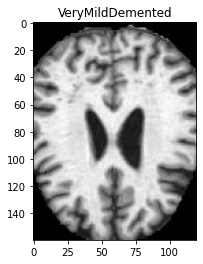

In [75]:
#TESTING MODEL
for images_batch,labels_batch in test_ds.take(1):
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[0].numpy()])

first image to actual predict
1/1 [==============================] - 0s 111ms/step
.ipynb_checkpoints


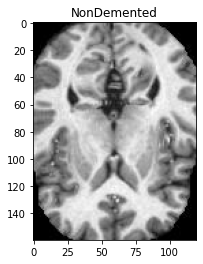

In [76]:
import numpy as np
for images_batch,labels_batch in test_ds.take(1):
  
    print("first image to actual predict");
    plt.imshow(images_batch[0].numpy().astype('uint8'))
    plt.title(class_names[labels_batch[0].numpy()]) 

    batch_predication=model.predict(images_batch)
    print(class_names[np.argmax(batch_predication[0])])

In [77]:
# MODEL PREDICT ACURACY
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 14ms/step


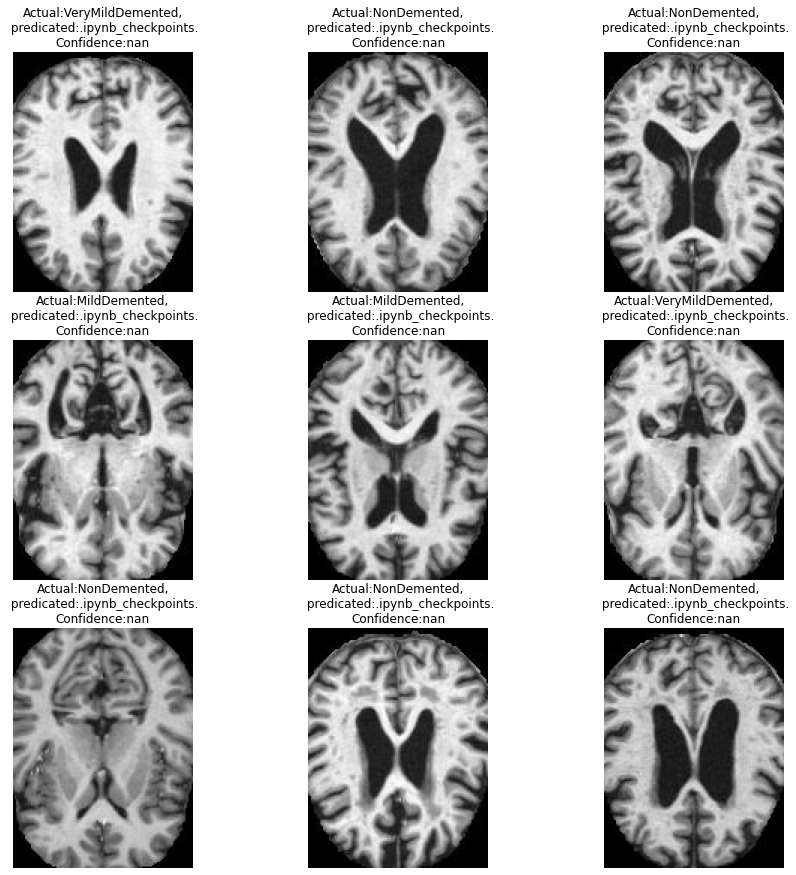

In [78]:
plt.figure(figsize=(15,15))
for images,labels in test_ds.take(1):
    for i in range(9):
       ax=plt.subplot(3,3,i+1)
       plt.imshow(images[i].numpy().astype("uint8"))
       predicted_class, confidence=predict(model,images[i].numpy())
       actual_class=class_names[labels[i]]
       plt.title(f"Actual:{actual_class},\n predicated:{predicted_class}.\nConfidence:{confidence}")
       plt.axis("off")

In [ ]:
#Model save in google drive
from google.colab import drive

model_version=1
model.save("/content/drive/MyDrive/Azymer_dieases_detection/{model_version}")